In [1]:
from gensim.models import Word2Vec, FastText
from note_reader import get_notes
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
plt.rcParams["font.family"] = ["Times"]

In [3]:
file_list = glob.glob("data/txt/*.txt")

In [7]:
docs, counts = get_notes(file_list, as_pitch_classes=True, return_counts=True)

In [8]:
pitches_sorted = counts.most_common()
pitches, pitch_counts = zip(*pitches_sorted)

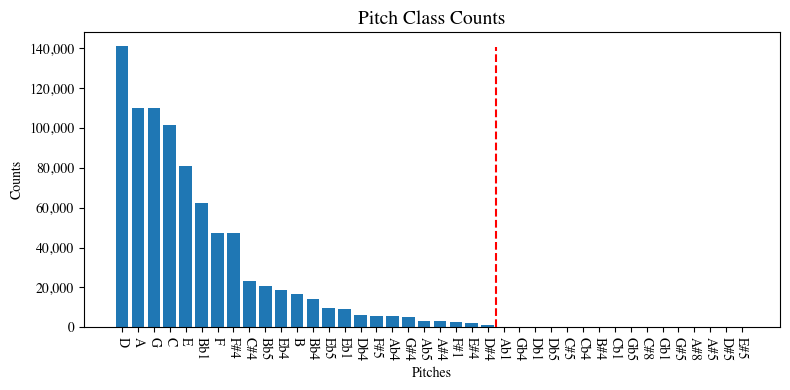

In [10]:
fig = plt.figure(figsize=(8, 4))
plt.title("Pitch Class Counts", fontdict={"fontsize": 14})
plt.xlabel("Pitches")
plt.xticks(rotation=-90)
plt.ylabel("Counts")
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.bar(pitches, pitch_counts)
plt.tight_layout()
plt.axvline(x=23.5, ymax=0.95, color="r", linestyle="--")
plt.show()

In [18]:
common_pitches = [x[0] for x in counts.most_common(24)]
common_docs = []
for doc in docs:
    common_doc = [x for x in doc if x in common_pitches]
    common_docs.append(common_doc)

In [19]:
w2v_model = Word2Vec(sentences=common_docs, vector_size=50, epochs=10)

In [20]:
w2v_model.wv.most_similar(positive=["G"])

[('F#4', 0.4909704327583313),
 ('Eb4', 0.20498555898666382),
 ('Eb1', 0.1877521425485611),
 ('Ab4', 0.14933408796787262),
 ('E#4', 0.1300577074289322),
 ('Eb5', 0.12886422872543335),
 ('Bb5', 0.0690283477306366),
 ('A', 0.018412211909890175),
 ('C#4', -0.012664446607232094),
 ('Bb4', -0.014991480857133865)]

In [21]:
w2v_model.wv.most_similar(positive=["G", "A"], negative=["D"])

[('F#4', 0.3111855685710907),
 ('E#4', 0.2296924740076065),
 ('Eb1', 0.1868053376674652),
 ('Bb5', 0.16920705139636993),
 ('Eb5', 0.1401526927947998),
 ('F#1', 0.06420011818408966),
 ('Db4', 0.053800083696842194),
 ('Eb4', -0.01434218417853117),
 ('Bb4', -0.014997382648289204),
 ('Ab4', -0.07291736453771591)]

In [22]:
ft_model = FastText(sentences=common_docs, vector_size=50, epochs=10)

In [23]:
ft_model.wv.most_similar("G")

[('F#4', 0.35663896799087524),
 ('Bb5', 0.1575150191783905),
 ('Eb4', 0.136526957154274),
 ('Ab4', 0.13236011564731598),
 ('A', 0.07887759804725647),
 ('Eb1', 0.05018726363778114),
 ('E#4', 0.019995061680674553),
 ('Eb5', 0.015813186764717102),
 ('Bb4', -0.025019032880663872),
 ('E', -0.052847106009721756)]

In [24]:
ft_model.wv["G"]

array([ 1.02374220e+00, -1.97383952e+00,  1.06859159e+00,  7.99570918e-01,
        7.52611637e-01, -2.22514078e-01,  7.02536941e-01,  7.65622973e-01,
       -1.28350711e+00, -1.13629654e-01,  5.08231938e-01, -4.14221346e-01,
        6.14227772e-01,  5.19979782e-02, -2.41724586e+00, -3.13414812e-01,
       -6.24885261e-01,  2.56824866e-03, -6.46050930e-01,  4.63194773e-02,
        6.35360032e-02,  7.40504444e-01, -1.03733480e+00,  7.62615681e-01,
       -3.15725893e-01, -1.08652198e+00, -6.08050823e-01, -2.35947371e+00,
       -6.31081760e-01,  5.25685489e-01,  2.42927170e+00, -9.68690887e-02,
        8.38299513e-01, -7.73007154e-01, -7.24575162e-01,  9.39708948e-01,
       -2.48234361e-01, -2.94243723e-01, -1.22310328e+00, -1.54492810e-01,
        1.09348702e+00, -2.63329697e+00, -5.37649870e-01,  7.63074994e-01,
       -2.12372351e+00,  1.92238450e-01,  1.51379919e+00, -1.60337853e+00,
        2.69709438e-01, -1.03184104e-01], dtype=float32)

In [25]:
ft_model.wv.most_similar(positive=["G", "A"], negative=["D"])

[('E#4', 0.24350367486476898),
 ('F#4', 0.21678979694843292),
 ('Bb5', 0.1754160374403),
 ('Db4', 0.10924383252859116),
 ('F#1', 0.07391013950109482),
 ('Eb1', 0.06479940563440323),
 ('Bb4', 0.03197569027543068),
 ('Eb5', 0.01612103171646595),
 ('G#4', 0.013133954256772995),
 ('Eb4', 0.007603759411722422)]

In [26]:
np.rad2deg(np.arccos(ft_model.wv.similarity("G", "F#4")))

69.10607